# O modelo da regressão linear simples

Uma equação de reta representa a relação entre duas variáveis de forma deterministica. 
Para um dado valor $x$ é produzida uma resposta $y$. 
Ao variar $x$, o valor de $y$ muda proporcionalmente. 

Quando essa relação não pode ser exatamente determinada, sendo que para uma certa variação em $x$ há uma variação em $y$ dada por $y + \epsilon$, sendo $\epsilon$ o erro em $y$ em relação à equação determinística. 
Assim as variáveis se relacionam de forma não determinística pois o resultado é estatístico.

Pode-se dizer que existe uma reta que representa a tendência da distribuição de pontos, da seguinte forma:

$ y = \beta_0 + \beta_1 x + \epsilon$

* $x$: variável independente;
* $y$: variável dependente ou resposta;
* $\beta_0$: coeficiente linear, indica em que ponto a reta intercepta o eixo resposta;
* $\beta_1$: coeficiente angular, indica o grau de inclinação da reta, ou seja, qual é a variação de $x$ necessária para variar $y$ em uma unidade.
* $\epsilon$: disperção vertical do ponto em relação à equação de reta, erro.


## O princípio dos mínimos quadrados 

O desvio vertical do ponto ($x_i, y_i$) da reta $y = b_0 = b_1 x_i$  $y = b_0 + b_1 x$ é:

$AlturaDoPonto - AlturaDaReta = y_i - (b_0 + b_1 x_i)$

A soma dos desvios quadrados verticais dos pontos $(x_1,y_1)$, ... , $(x_n, y_n)$ à reta é, portanto:

$f(b_0, b_1) = \sum\limits_{i=0}^{n}[y_i - (b_0+b_1 x_i)]^2 $



As estimativas pontuais de $\beta_0$ e $\beta_1$, representadas por $\hat \beta_0$ e $\hat \beta_1$ e denominadas **estimativas dos
mínimos quadrados**, são aqueles valores que minimizam $f (b_0 , b_1)$. Ou seja,

$\hat \beta_0$ e $\hat \beta_1$  são tais que


$f(\hat \beta_0,\hat \beta_1) \le f(b_0 , b_1)$ 

para qualquer $b_0 \text{ e } b_1$. 

A **reta de regressão estimada** ou a **reta dos mínimos
quadrados** é, portanto, a reta cuja equação é 

$ y = \hat \beta_0 + \hat \beta_1 x$

A estimativa dos mínimos quadrados do coeficiente angular $\beta_1$ da reta de regressão real é:

$ b_1 = \hat \beta_1 = \frac{\sum (x_i - \overline{x})(y_i - \overline{y})}{\sum (x_i - \overline{x})^2 } = \frac{S_{xy}}{S_{xx}}$




As fórmulas de cálculo do numerador e denominador de $\hat \beta_1$ são:

$ S_{xx} = \sum x_i y_i - \frac{(\sum x_1)(\sum y_1)}{n} $

$ S_{xx} = \sum x_i^2 - \frac{(\sum x_i)^2}{n} $


A estimativa dos mínimos quadrados do termo constante $\hat \beta_0$ 0 da reta de regressão real é:

$ b_0 = \hat \beta_0 = \frac{\sum y_i - \hat \beta_i \sum x_i}{n} = \overline{y} - \hat \beta_1 \overline{x} $

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("regressao_linear_dataset_ex1.csv")
df

,x,y
0,99.0,28.8
1,101.1,27.9
2,102.7,27.0
3,103.0,25.2
4,105.4,22.8
5,107.0,21.5
6,108.7,20.9
7,110.8,19.6
8,112.1,17.1
9,112.4,18.9


In [3]:
x = [99.0, 101.1, 102.7, 103.0, 105.4, 107.0, 108.7, 110.8, 112.1, 112.4, 113.6, 113.8, 115.1, 115.4, 120.0]
y = [28.8, 27.9, 27.0, 25.2, 22.8, 21.5, 20.9, 19.6, 17.1, 18.9, 16.0, 16.7, 13.0, 13.6, 10.8 ]

df = pd.DataFrame({'x':x, 'y':y})
df['xx'] = df['x'] * df['x']
df['xy'] = df['x'] * df['y']
df['yy'] = df['y'] * df['y']
df


,x,y,xx,xy,yy
0,99.0,28.8,9801.00,2851.20,829.44
1,101.1,27.9,10221.21,2820.69,778.41
2,102.7,27.0,10547.29,2772.90,729.00
3,103.0,25.2,10609.00,2595.60,635.04
4,105.4,22.8,11109.16,2403.12,519.84
5,107.0,21.5,11449.00,2300.50,462.25
6,108.7,20.9,11815.69,2271.83,436.81
7,110.8,19.6,12276.64,2171.68,384.16
8,112.1,17.1,12566.41,1916.91,292.41
9,112.4,18.9,12633.76,2124.36,357.21


In [ ]:
dfsum = []
dfsum.append(df['x'].sum())
dfsum.append(df['y'].sum())
dfsum.append(df['xx'].sum())
dfsum.append(df['xy'].sum())
dfsum.append(df['yy'].sum())

dfsum

$\hat \beta_1 = \frac{S_{xy}}{S_{xx}}$ 

In [34]:
Sum_x = df['x'].sum()
Sum_y = df['y'].sum()
Sum_xx = df['xx'].sum()
Sum_xy = df['xy'].sum()
n = df['x'].count()

S_xy = Sum_xy - Sum_x*Sum_y/n
S_xx = Sum_xx - Sum_x.__pow__(2)/n

beta_1 = S_xy/S_xx
beta_1

-0.9047306579482158

In [35]:
# Média de x e y
x_med = df['x'].mean()
y_med = df['y'].mean()

beta_0 = y_med - (beta_1)*x_med
beta_0

118.90991680672457

Modelo de regressão linear

$ Y = \beta_1 x + \beta_0$

In [36]:
print('y = {}x + {}'.format(round(beta_1,2),round(beta_0,2)))

y = -0.9x + 118.91


# Gráfico

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
x = np.linspace(df['x'].min(), df['x'].max())
def f(x): return -0.9*x + 118.91

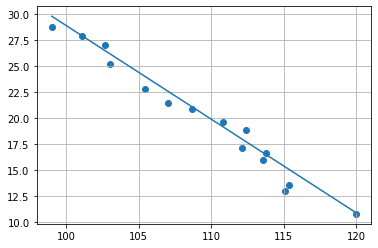

In [39]:
plt.plot(x, f(x) )
plt.scatter( df['x'], df['y'] )
plt.grid()
plt.show()